In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from wordcloud import WordCloud


In [34]:
df = pd.read_csv("/content/12z.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [35]:
print("Data format", df.shape)

Data format (541909, 8)


In [36]:
print('Types of data\n', df.dtypes)

Types of data
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [37]:
print('Number of missing values\n', df.isna().sum())

Number of missing values
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [38]:
df=df.dropna(subset=["CustomerID"])

In [42]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [43]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


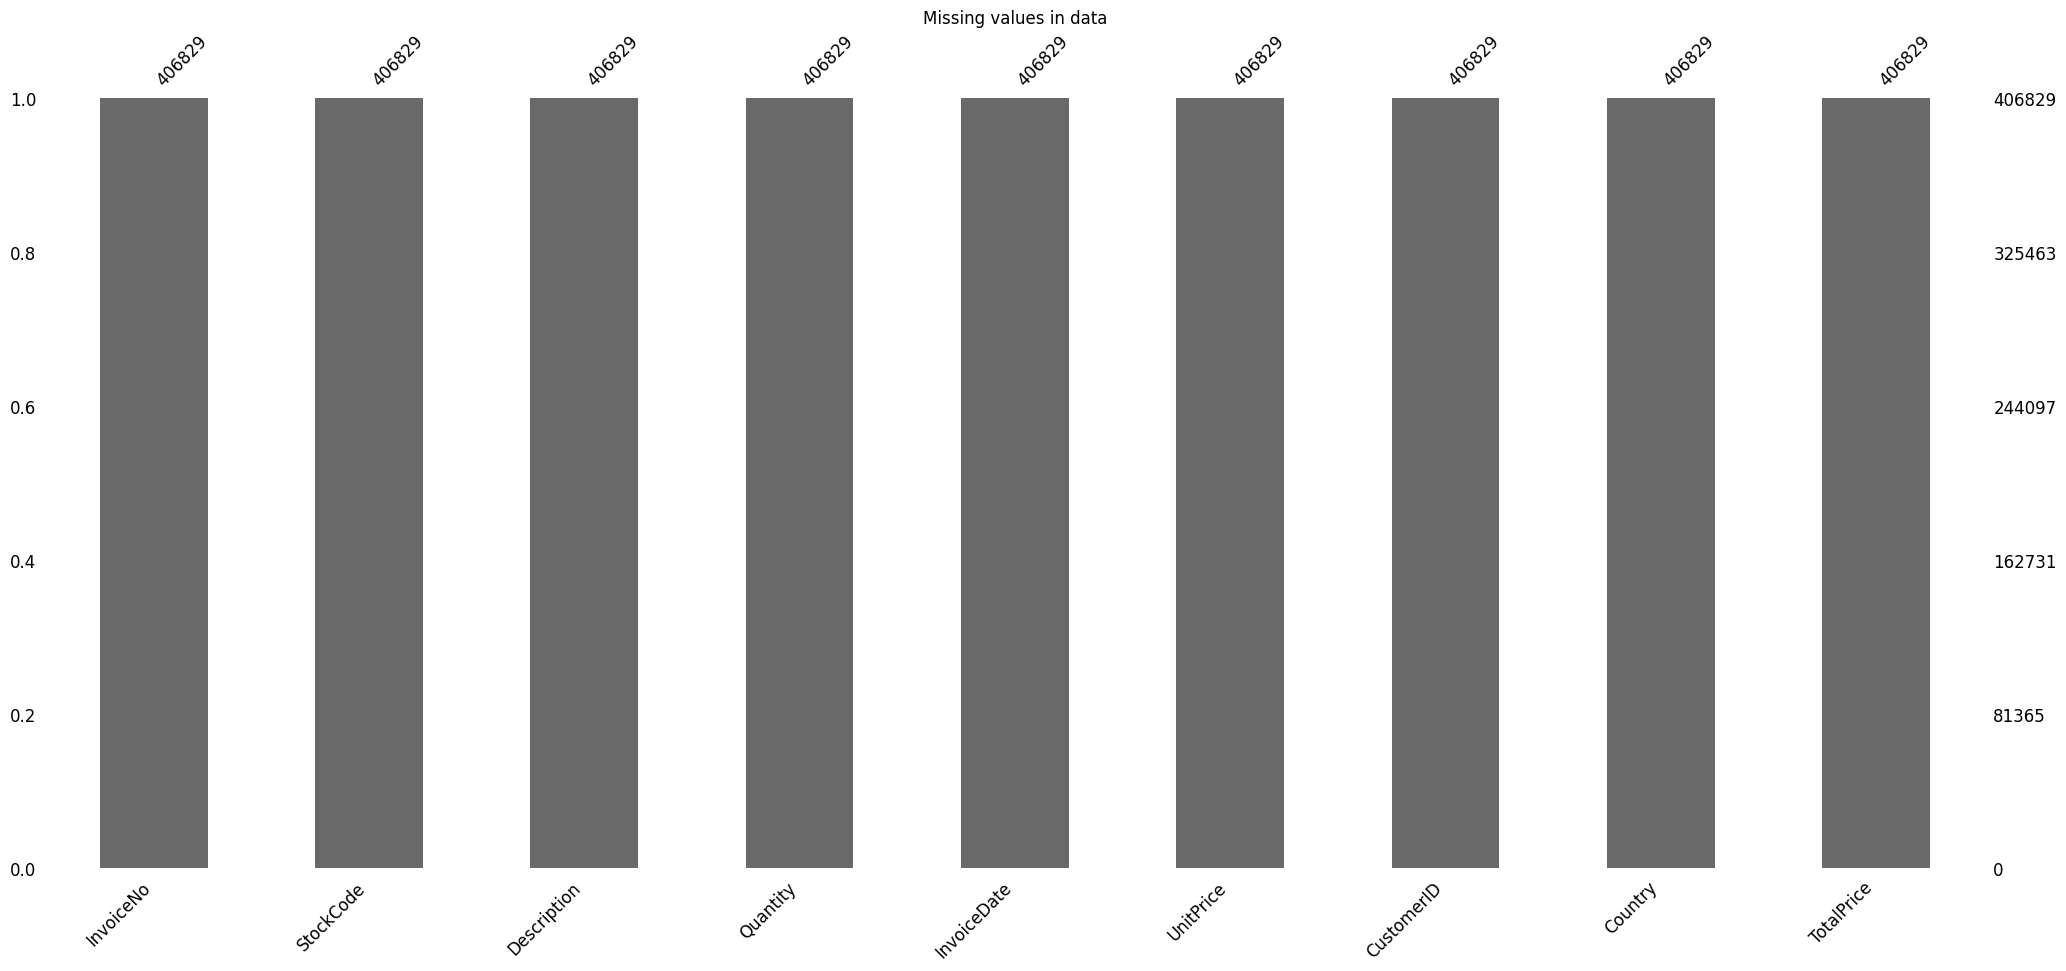

In [44]:
msno.bar(df,fontsize=12)
plt.title("Missing values in data")
plt.show()

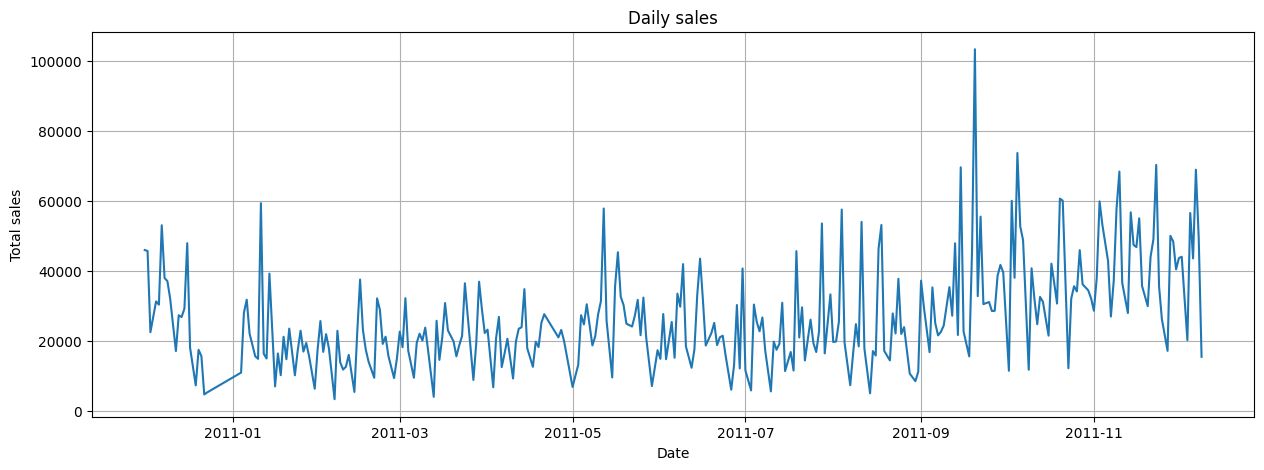

In [45]:
sales_by_date = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()
sales_by_date.plot(figsize=(15,5))
plt.title("Daily sales")
plt.ylabel("Total sales")
plt.xlabel("Date")
plt.grid()
plt.show()


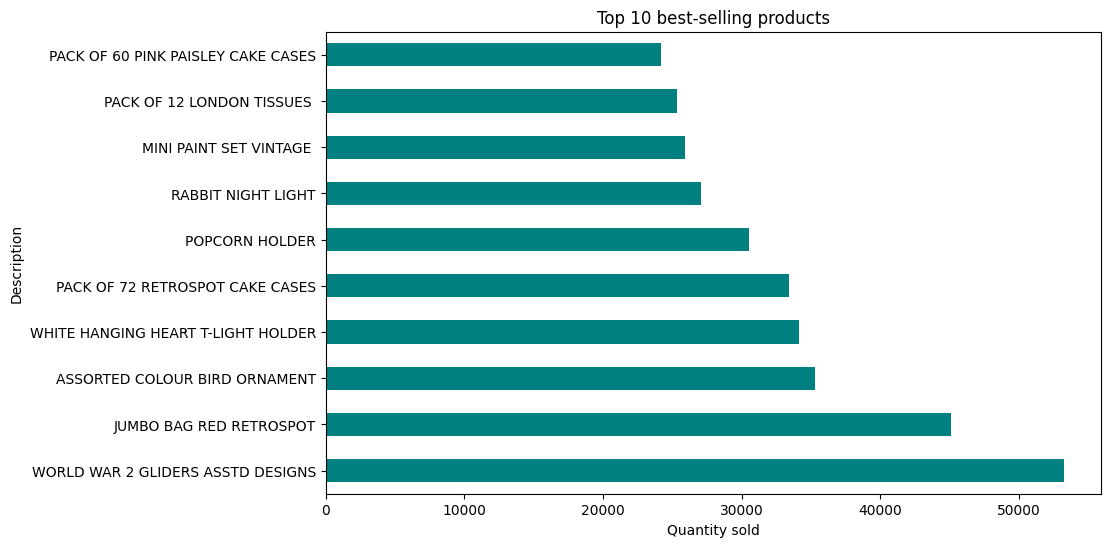

In [46]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10,6), color='teal')
plt.title("Top 10 best-selling products")
plt.xlabel("Quantity sold")
plt.show()


In [47]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
px.bar(country_sales, title="Sales by country (top 10)", labels={'value':'Total sales', 'Country':'Country'})


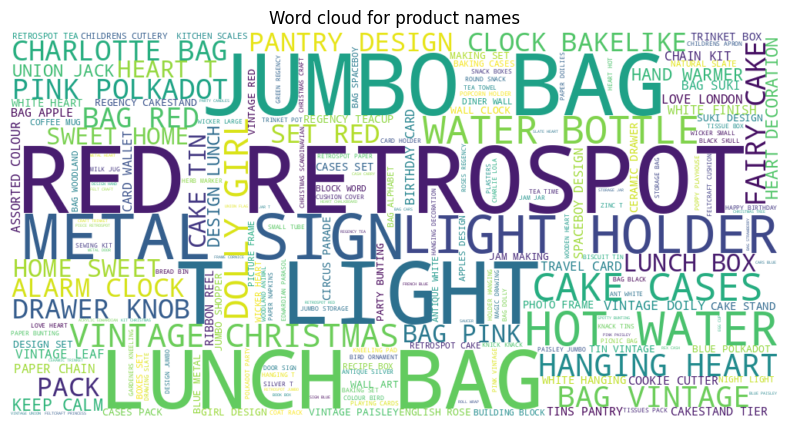

In [49]:
text = ' '.join(df['Description'].dropna().astype(str).values)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word cloud for product names")
plt.show()


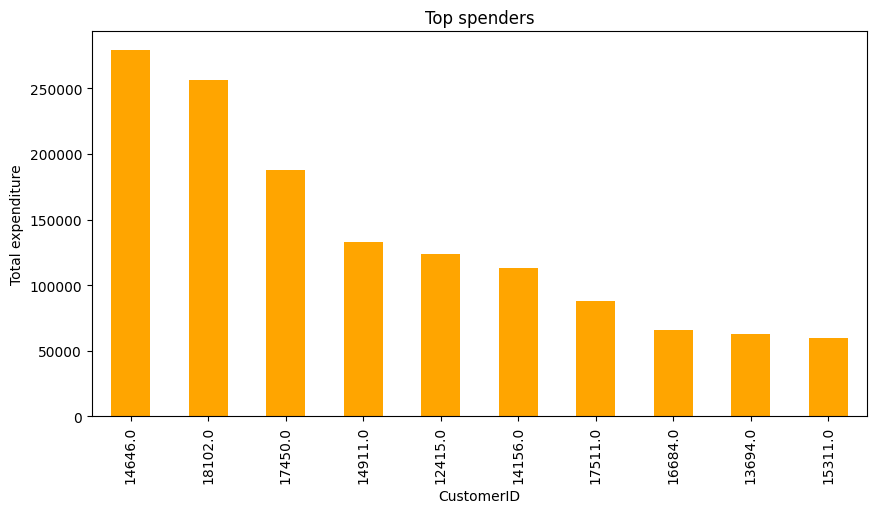

In [51]:
customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
customers.plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Top spenders")
plt.ylabel("Total expenditure")
plt.show()


In [52]:
fig = px.line(df.groupby('InvoiceDate')['TotalPrice'].sum().reset_index(),
              x='InvoiceDate', y='TotalPrice',
              title='📈 Sales growth over time')
fig.show()